# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **Load Dataset**

In [ ]:
df = pd.read_csv("/content/airplane_price_dataset.csv")
df.head()

Model  Üretim Yılı  Motor Sayısı Motor Türü  Kapasite  Menzil (km)  Yakıt Tüketimi (L/saat)  Saatlik Bakım Maliyeti ($)  Yaş  Satış Bölgesi     Fiyat ($)
0  Bombardier CRJ200         1987             2   Turbofan        50         3000                   14.360                    2185.430   36           Asya  12857083.910
1  Bombardier CRJ200         1997             2   Turbofan        50         3000                    4.030                    1202.080   26         Avrupa  13914058.550
2        Airbus A320         1988             2   Turbofan       180         6300                   13.260                     761.380   35     Avustralya  90735695.860
3         Boeing 737         2023             2   Turbofan       162         5700                   14.610                     592.630    0     Avustralya 136659689.370
4         Cessna 172         1985             1     Piston         4         1285                   18.490                    4245.990   38  Güney Amerika    203798.100

In [ ]:
df = df.rename(columns={
    'Unnamed: 0': 'index',
    'Model': 'model',
    'Üretim Yılı': 'year_of_production',
    'Motor Sayısı': 'number_of_engines',
    'Motor Türü': 'engine_type',
    'Kapasite': 'capacity',
    'Menzil (km)': 'range_kilometer',
    'Yakıt Tüketimi (L/saat)': 'fuel_consumption',
    'Saatlik Bakım Maliyeti ($)': 'hourly_maintenance_cost',
    'Yaş': 'age',
    'Satış Bölgesi': 'Sales Territory',
    'Fiyat ($)': 'price'
})

df.head()

model  year_of_production  number_of_engines engine_type  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age Sales Territory         price
0  Bombardier CRJ200                1987                  2    Turbofan        50             3000            14.360                 2185.430   36            Asya  12857083.910
1  Bombardier CRJ200                1997                  2    Turbofan        50             3000             4.030                 1202.080   26          Avrupa  13914058.550
2        Airbus A320                1988                  2    Turbofan       180             6300            13.260                  761.380   35      Avustralya  90735695.860
3         Boeing 737                2023                  2    Turbofan       162             5700            14.610                  592.630    0      Avustralya 136659689.370
4         Cessna 172                1985                  1      Piston         4             1285            18.490                 4245.990   38   Güney Amerika    203798.100

In [ ]:
df['model'].value_counts()

model
Boeing 737           2121
Airbus A350          2107
Bombardier CRJ200    2051
Airbus A320          2048
Cessna 172           2039
Boeing 777           2011
Name: count, dtype: int64

In [ ]:
df['Sales Territory'].value_counts()

Sales Territory
Afrika           2171
Avustralya       2071
Avrupa           2062
Güney Amerika    2053
Asya             2017
Kuzey Amerika    2003
Name: count, dtype: int64

In [ ]:
df.shape

(12377, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12377 entries, 0 to 12376
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   model                    12377 non-null  object 
 1   year_of_production       12377 non-null  int64  
 2   number_of_engines        12377 non-null  int64  
 3   engine_type              12377 non-null  object 
 4   capacity                 12377 non-null  int64  
 5   range_kilometer          12377 non-null  int64  
 6   fuel_consumption         12377 non-null  float64
 7   hourly_maintenance_cost  12377 non-null  float64
 8   age                      12377 non-null  int64  
 9   Sales Territory          12377 non-null  object 
 10  price                    12377 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.0+ MB


In [ ]:
df.isna().sum()

model                      0
year_of_production         0
number_of_engines          0
engine_type                0
capacity                   0
range_kilometer            0
fuel_consumption           0
hourly_maintenance_cost    0
age                        0
Sales Territory            0
price                      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe().T

count          mean           std        min          25%          50%           75%           max
year_of_production      12377.000      2001.478        12.767   1980.000     1990.000     2001.000      2013.000      2023.000
number_of_engines       12377.000         1.835         0.371      1.000        2.000        2.000         2.000         2.000
capacity                12377.000       190.414       142.663      4.000       50.000      162.000       350.000       396.000
range_kilometer         12377.000      7782.210      5492.479   1285.000     3000.000     5700.000     14800.000     15600.000
fuel_consumption        12377.000        12.076         9.905      2.000        5.950        9.820        13.470        49.970
hourly_maintenance_cost 12377.000      2744.090      1293.210    500.020     1627.260     2744.330      3848.840      4999.660
age                     12377.000        21.522        12.767      0.000       10.000       22.000        33.000        43.000
price                   12377.000 198833649.571 229039179.233 145814.790 14096813.610 83921913.750 384323880.640 978213228.630

In [ ]:
df.columns

Index(['model', 'year_of_production', 'number_of_engines', 'engine_type', 'capacity', 'range_kilometer', 'fuel_consumption', 'hourly_maintenance_cost', 'age', 'Sales Territory', 'price'], dtype='object')

In [ ]:
for col in df.columns:
  print(col, df[col].unique())
  print('-'*200)

model ['Bombardier CRJ200' 'Airbus A320' 'Boeing 737' 'Cessna 172' 'Airbus A350'
 'Boeing 777']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
year_of_production [1987 1997 1988 2023 1985 1982 1993 2018 1992 2014 2008 1980 2007 1989
 1986 2009 2004 1998 2003 1984 1994 2002 2021 2020 1995 2015 2000 2016
 2005 2017 1996 2012 1999 2013 2011 2010 1981 2022 1983 1990 2019 2001
 2006 1991]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
number_of_engines [2 1]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
engine_type ['Turbofan' 'Piston']

In [ ]:
df.head()

model  year_of_production  number_of_engines engine_type  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age Sales Territory         price
0  Bombardier CRJ200                1987                  2    Turbofan        50             3000            14.360                 2185.430   36            Asya  12857083.910
1  Bombardier CRJ200                1997                  2    Turbofan        50             3000             4.030                 1202.080   26          Avrupa  13914058.550
2        Airbus A320                1988                  2    Turbofan       180             6300            13.260                  761.380   35      Avustralya  90735695.860
3         Boeing 737                2023                  2    Turbofan       162             5700            14.610                  592.630    0      Avustralya 136659689.370
4         Cessna 172                1985                  1      Piston         4             1285            18.490                 4245.990   38   Güney Amerika    203798.100

In [ ]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
df_numerical.head()

year_of_production  number_of_engines  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age         price
0                1987                  2        50             3000            14.360                 2185.430   36  12857083.910
1                1997                  2        50             3000             4.030                 1202.080   26  13914058.550
2                1988                  2       180             6300            13.260                  761.380   35  90735695.860
3                2023                  2       162             5700            14.610                  592.630    0 136659689.370
4                1985                  1         4             1285            18.490                 4245.990   38    203798.100

In [ ]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

model engine_type Sales Territory
0  Bombardier CRJ200    Turbofan            Asya
1  Bombardier CRJ200    Turbofan          Avrupa
2        Airbus A320    Turbofan      Avustralya
3         Boeing 737    Turbofan      Avustralya
4         Cessna 172      Piston   Güney Amerika

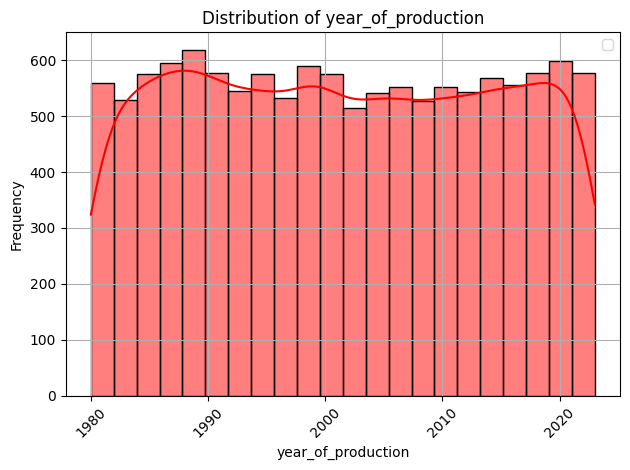

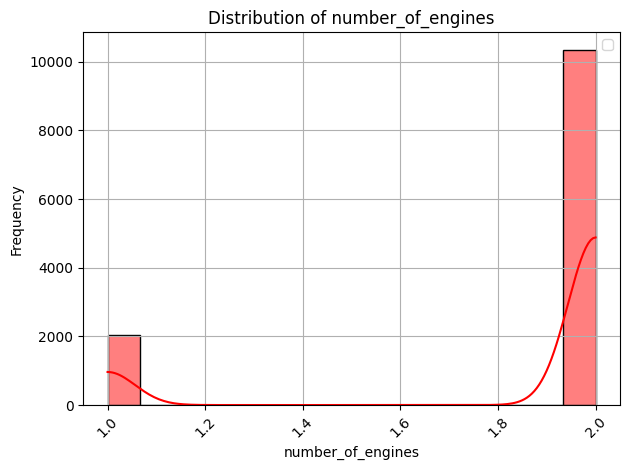

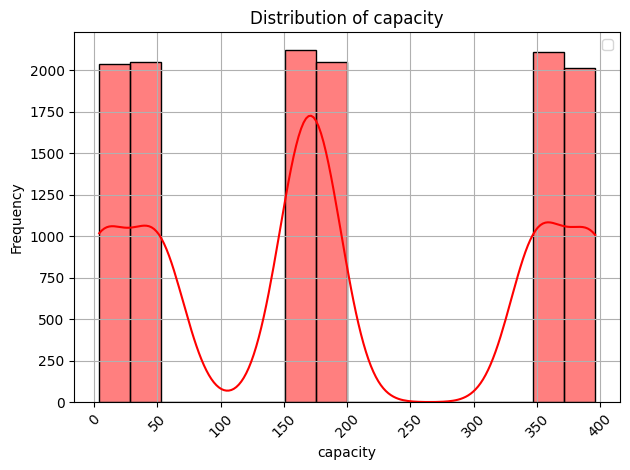

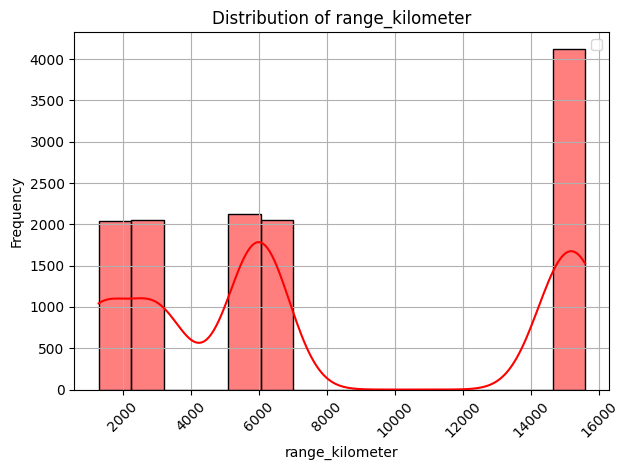

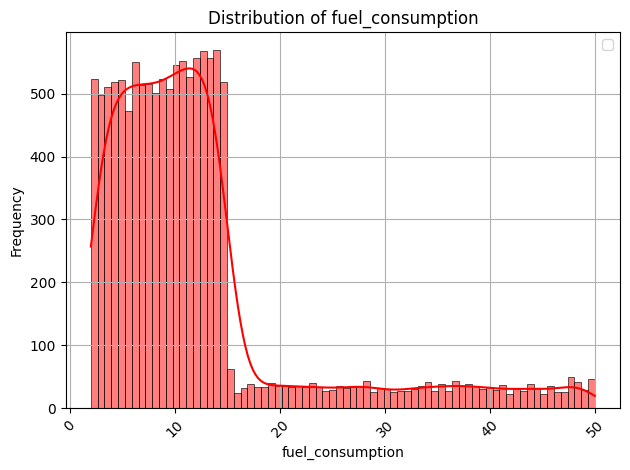

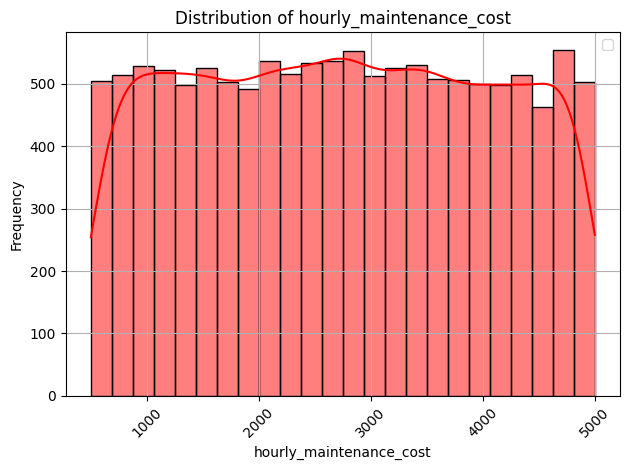

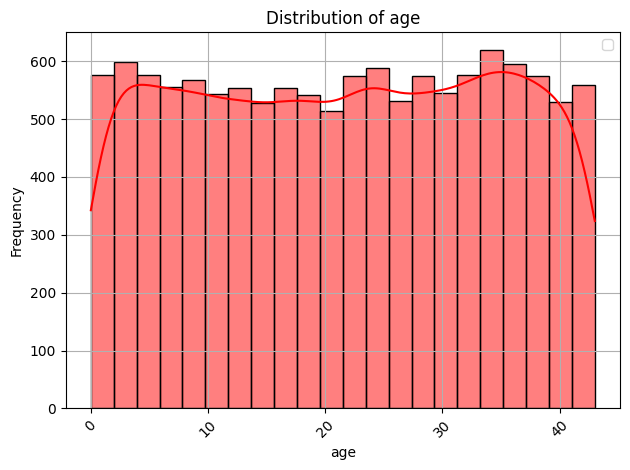

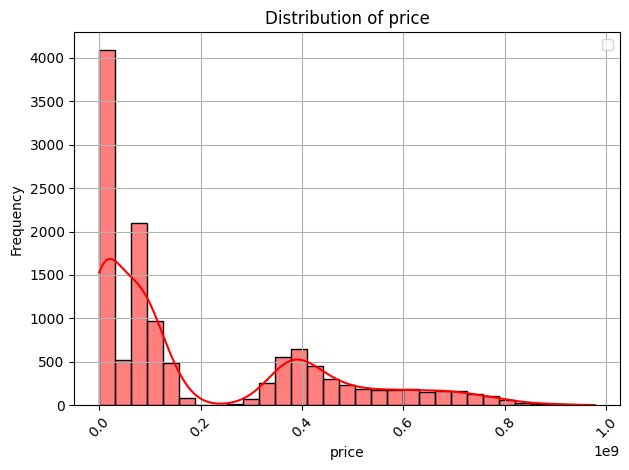

In [ ]:
for col in df_numerical.columns:
  sns.histplot(df_numerical[col], edgecolor='black', color='red', kde=True)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.grid()
  plt.legend()
  plt.show()

In [ ]:
df.head()

model  year_of_production  number_of_engines engine_type  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age Sales Territory         price
0  Bombardier CRJ200                1987                  2    Turbofan        50             3000            14.360                 2185.430   36            Asya  12857083.910
1  Bombardier CRJ200                1997                  2    Turbofan        50             3000             4.030                 1202.080   26          Avrupa  13914058.550
2        Airbus A320                1988                  2    Turbofan       180             6300            13.260                  761.380   35      Avustralya  90735695.860
3         Boeing 737                2023                  2    Turbofan       162             5700            14.610                  592.630    0      Avustralya 136659689.370
4         Cessna 172                1985                  1      Piston         4             1285            18.490                 4245.990   38   Güney Amerika    203798.100

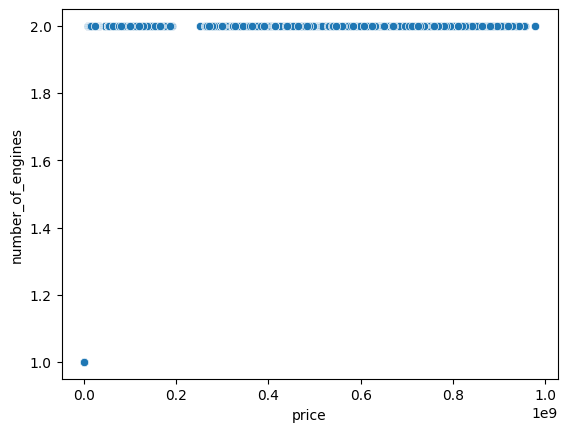

In [ ]:
sns.scatterplot(x='price', y='number_of_engines', data=df)
plt.show()

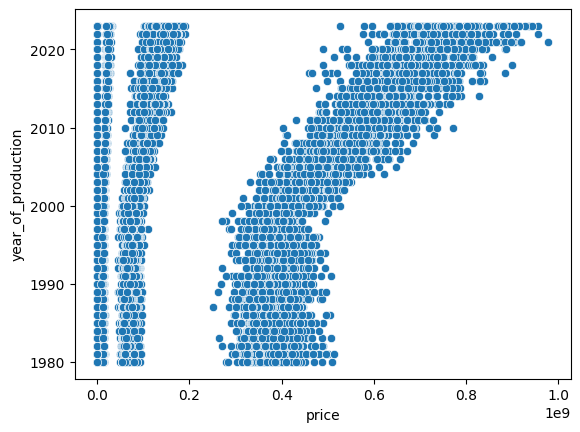

In [ ]:
sns.scatterplot(x='price',y='year_of_production', data=df, palette='viridis')
plt.show()

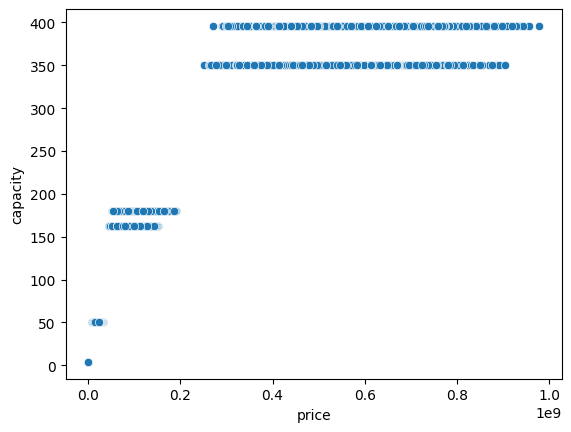

In [ ]:
sns.scatterplot(x='price', y='capacity', data=df)
plt.show()

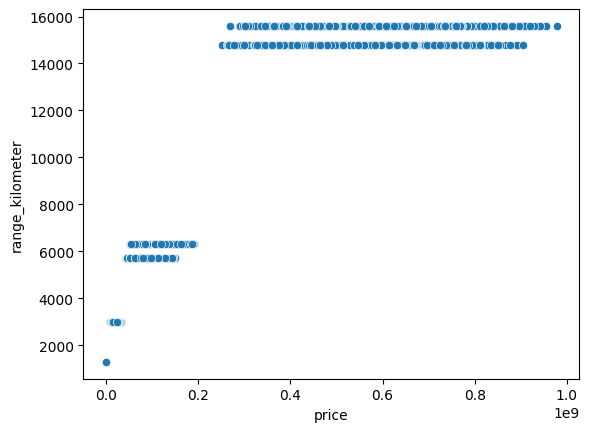

In [ ]:
sns.scatterplot(x='price', y='range_kilometer', data=df)
plt.show()

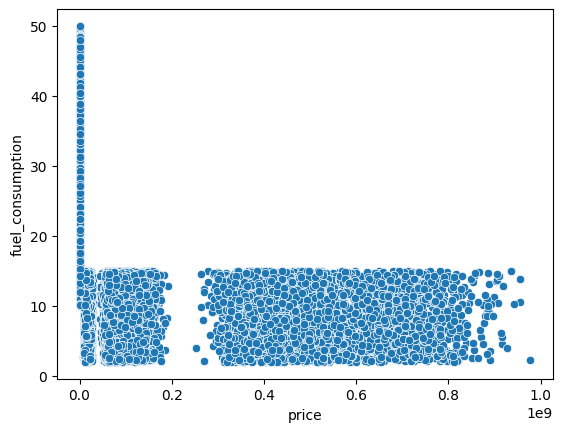

In [ ]:
sns.scatterplot(x='price', y='fuel_consumption', data=df)
plt.show()

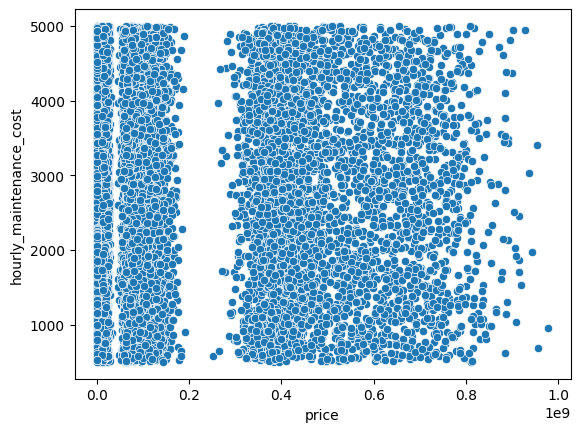

In [ ]:
sns.scatterplot(x='price', y='hourly_maintenance_cost', data=df)
plt.show()

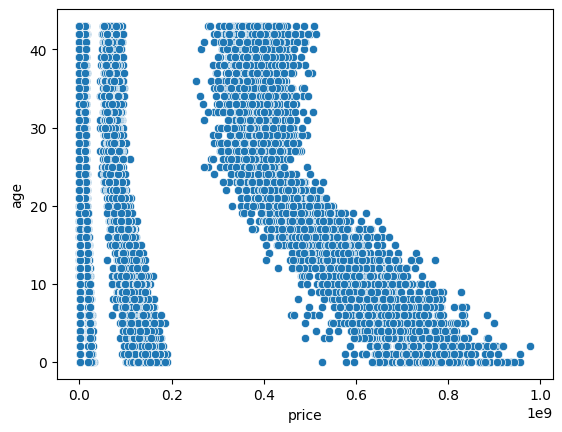

In [ ]:
sns.scatterplot(x='price', y='age', data=df)
plt.show()

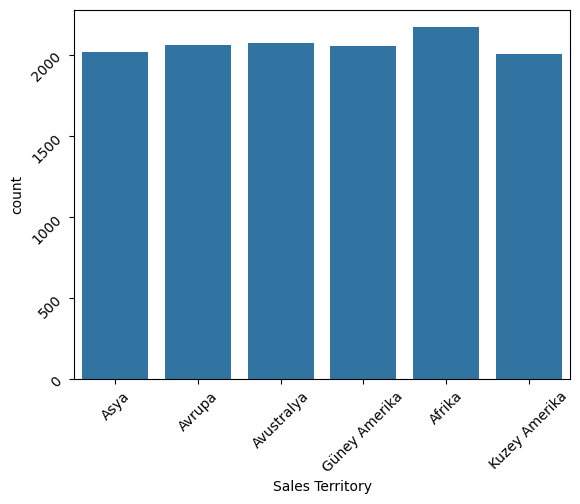

In [ ]:
sns.countplot(x='Sales Territory',data = df)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

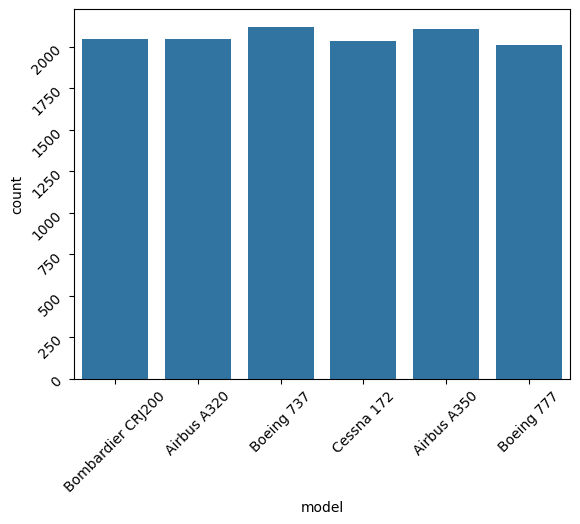

In [ ]:
sns.countplot(x='model', data=df)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

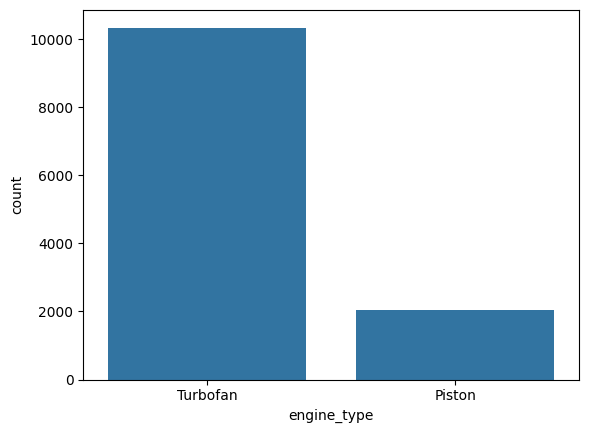

In [ ]:
sns.countplot(x='engine_type', data=df)
plt.show()

In [ ]:
df_numerical.corr()

year_of_production  number_of_engines  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost    age  price
year_of_production                    1.000             -0.020    -0.019           -0.019             0.020                   -0.010 -1.000  0.198
number_of_engines                    -0.020              1.000     0.580            0.525            -0.809                    0.008  0.020  0.385
capacity                             -0.019              0.580     1.000            0.990            -0.468                   -0.012  0.019  0.896
range_kilometer                      -0.019              0.525     0.990            1.000            -0.424                   -0.014  0.019  0.923
fuel_consumption                      0.020             -0.809    -0.468           -0.424             1.000                   -0.011 -0.020 -0.310
hourly_maintenance_cost              -0.010              0.008    -0.012           -0.014            -0.011                    1.000  0.010 -0.016
age                                  -1.000              0.020     0.019            0.019            -0.020                    0.010  1.000 -0.198
price                                 0.198              0.385     0.896            0.923            -0.310                   -0.016 -0.198  1.000

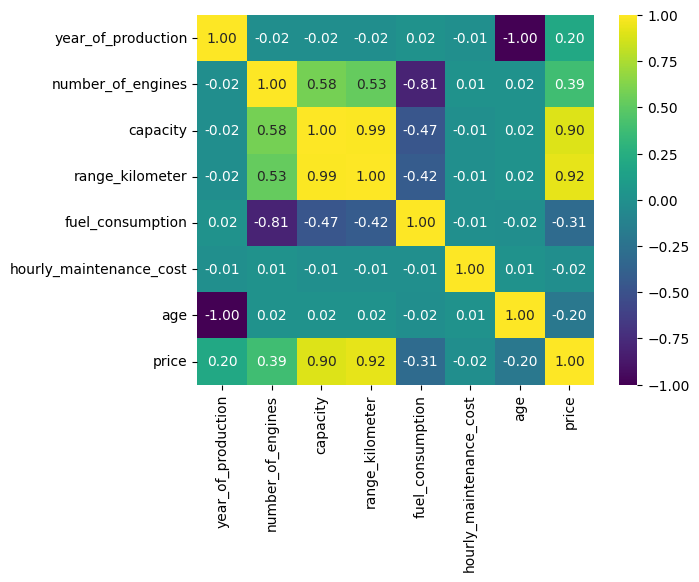

In [ ]:
sns.heatmap(df_numerical.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.show()

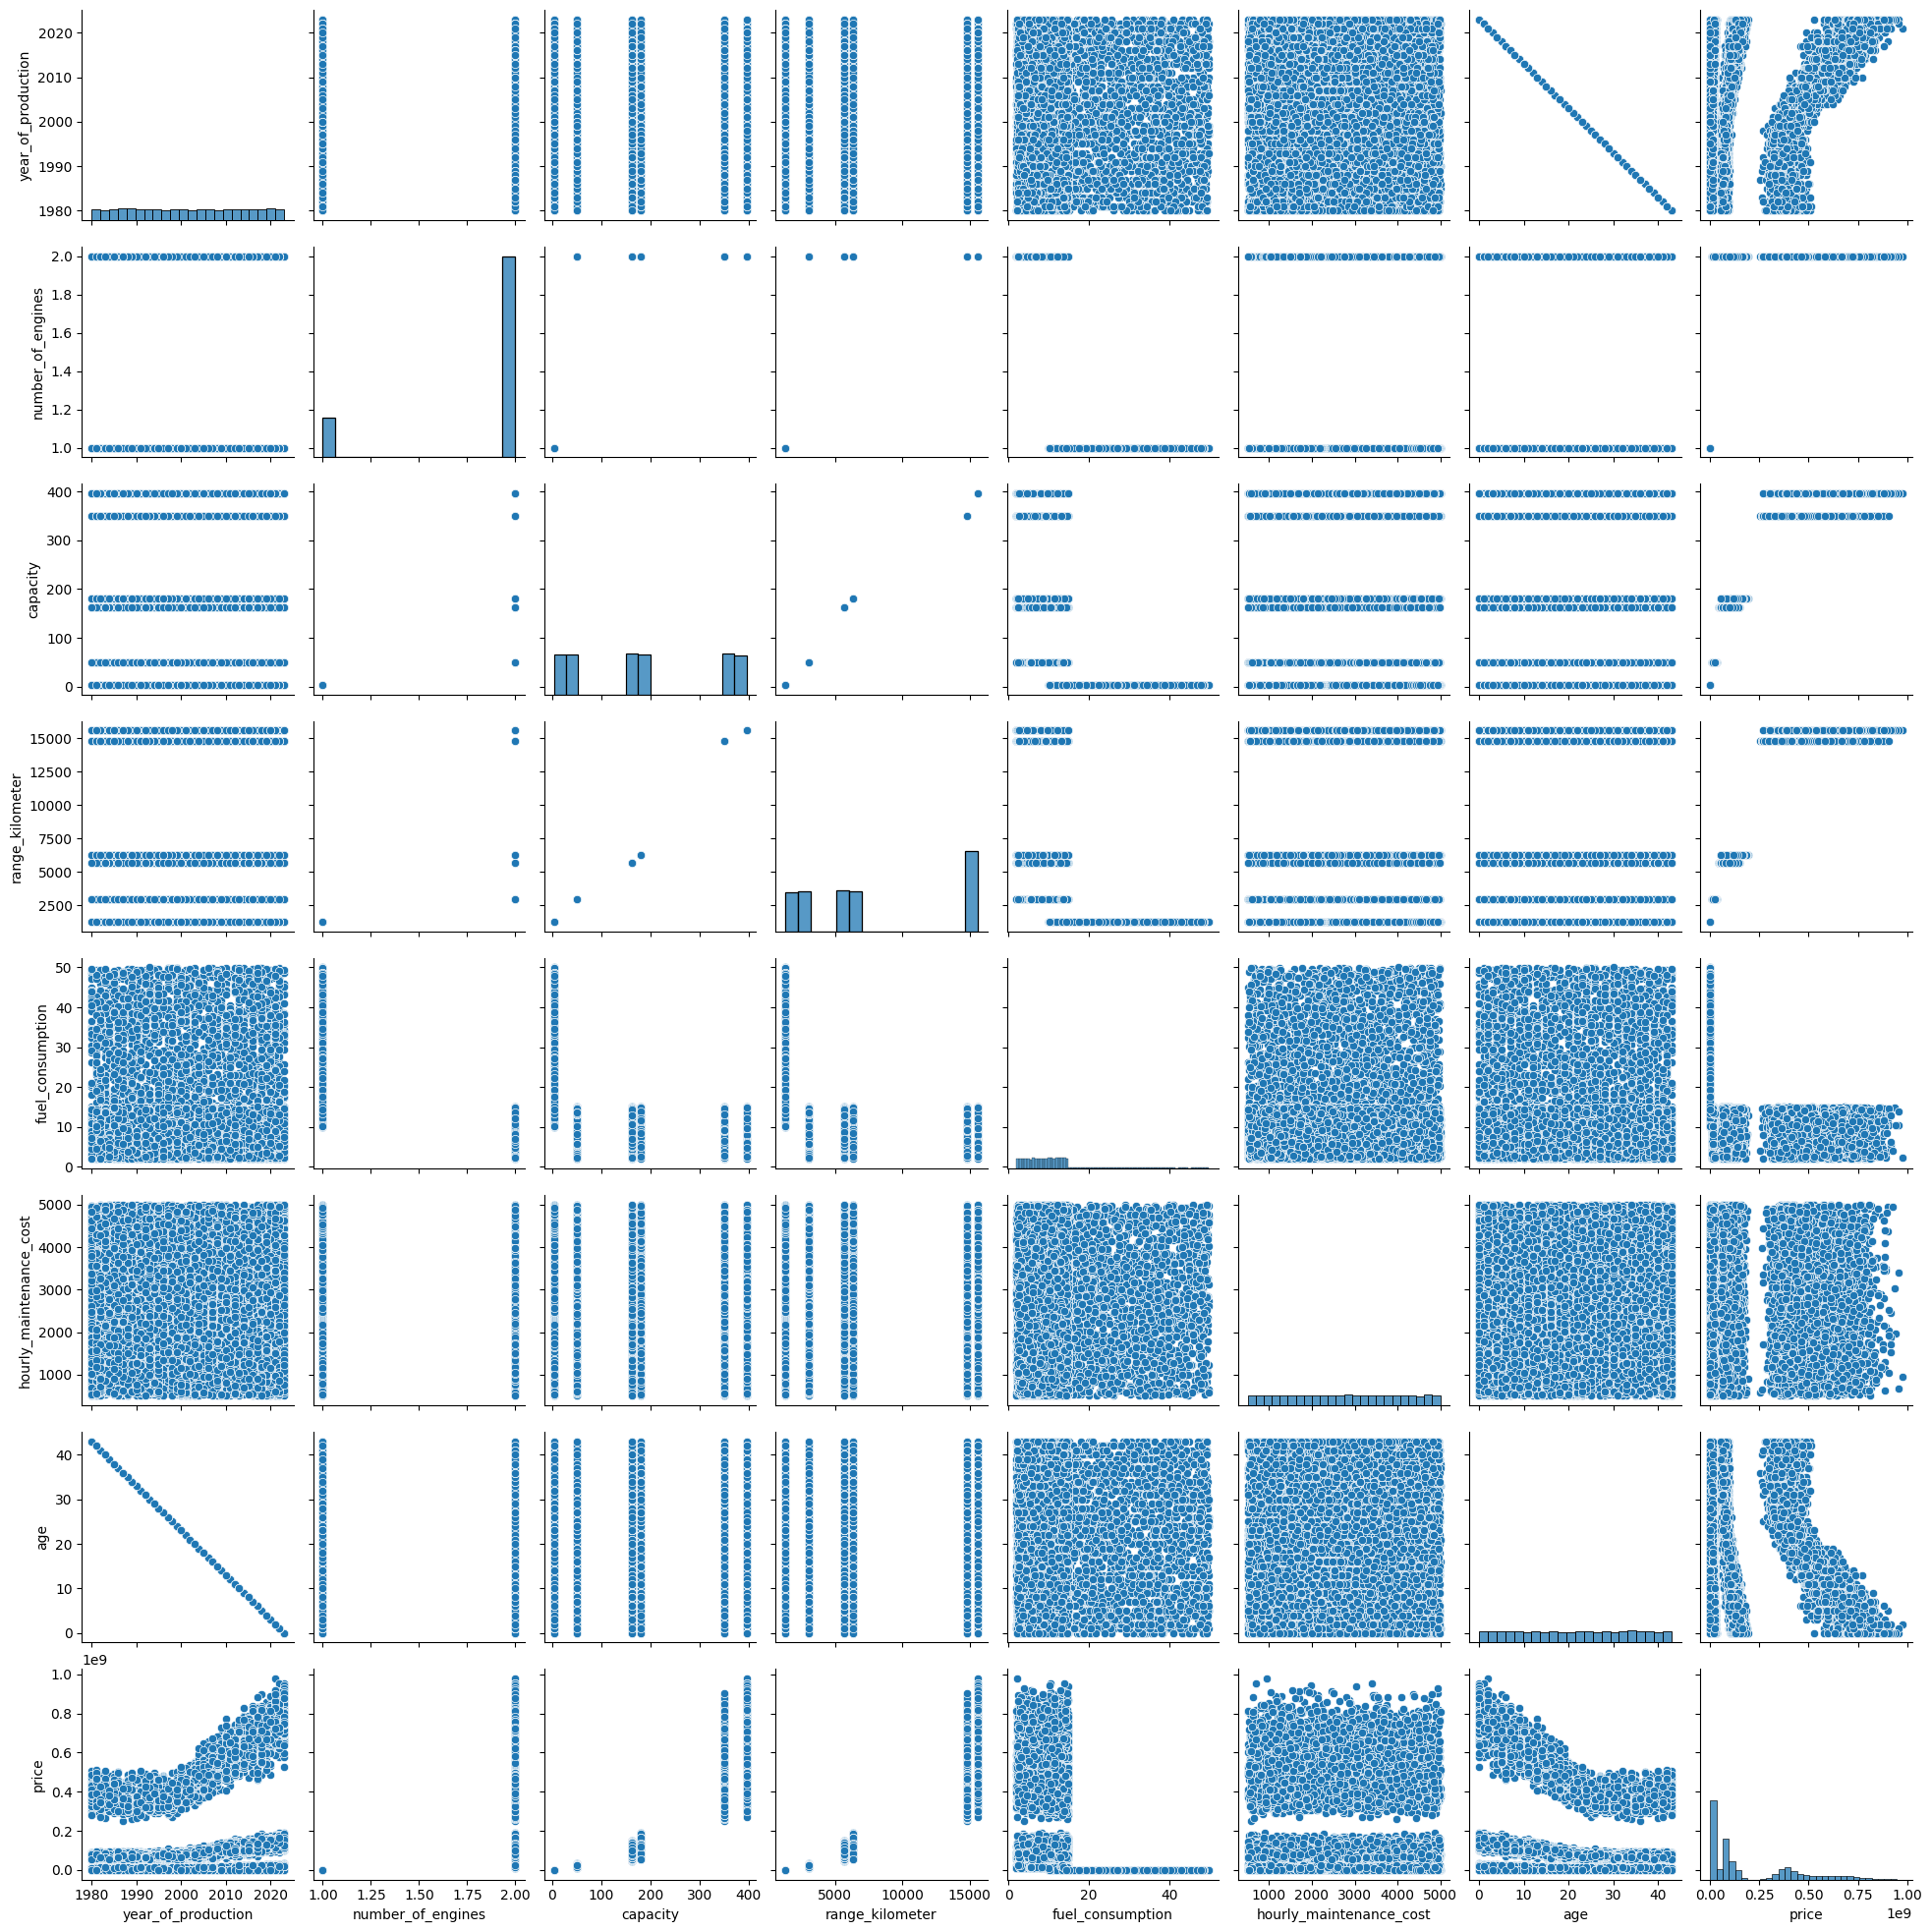

In [ ]:
sns.pairplot(df_numerical)
plt.show()

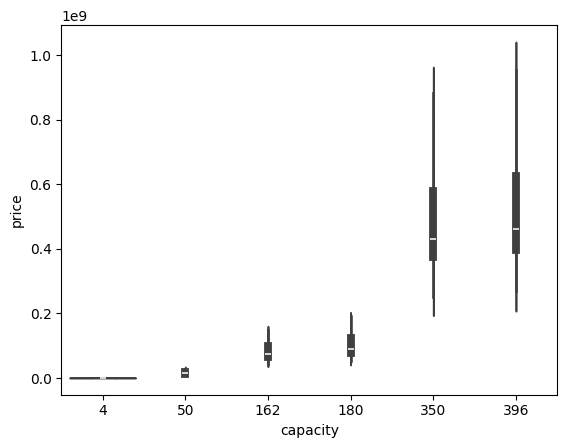

In [ ]:
sns.violinplot(x='capacity', y='price', data=df)
plt.show()

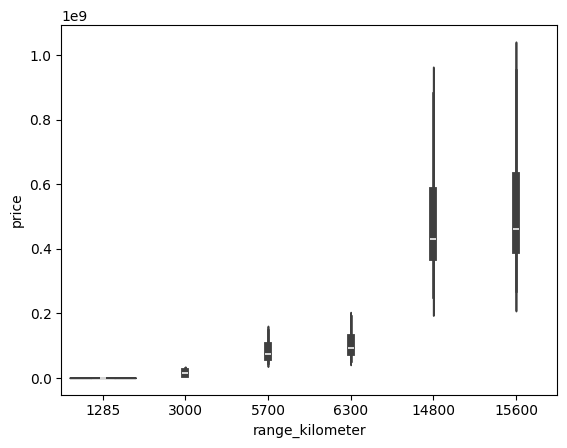

In [ ]:
sns.violinplot(x='range_kilometer', y='price', data=df)
plt.show()

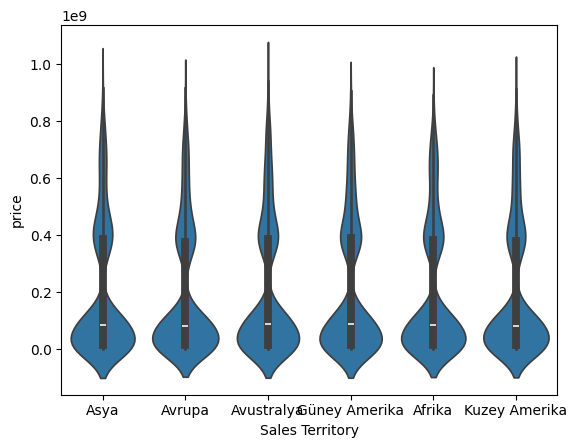

In [ ]:
sns.violinplot(x='Sales Territory', y='price', data=df)
plt.show()

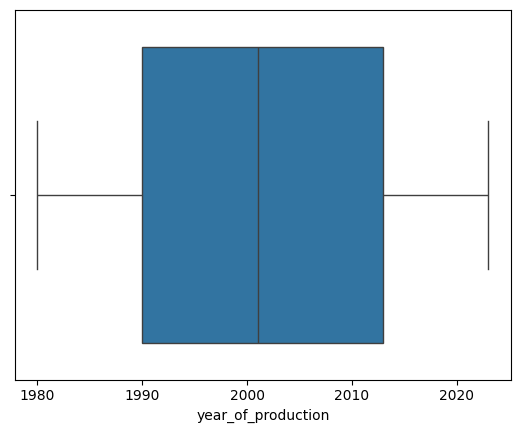

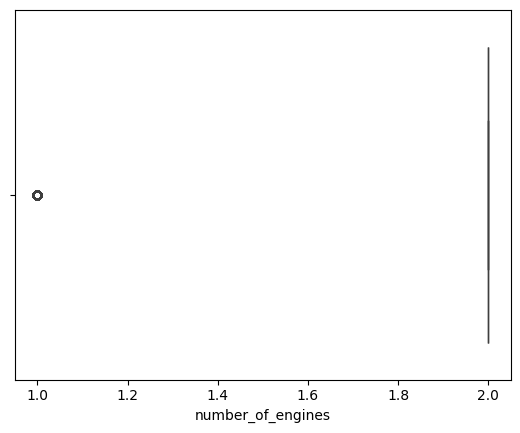

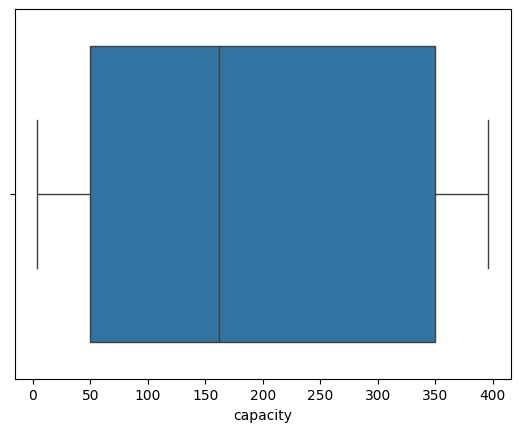

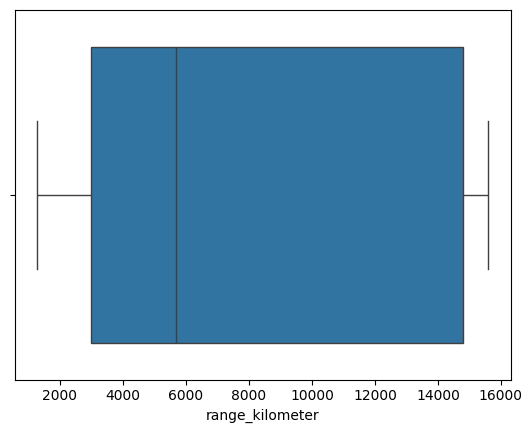

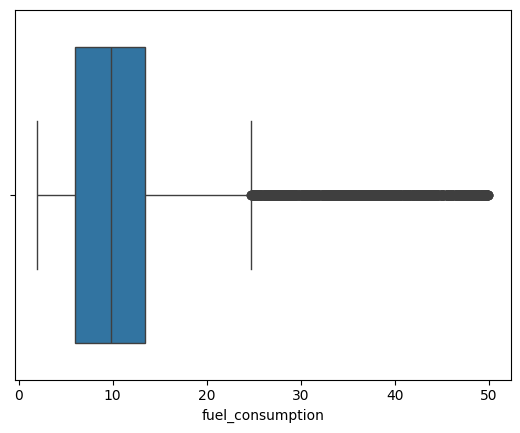

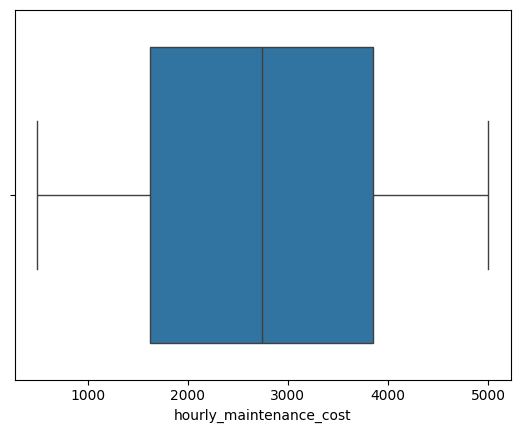

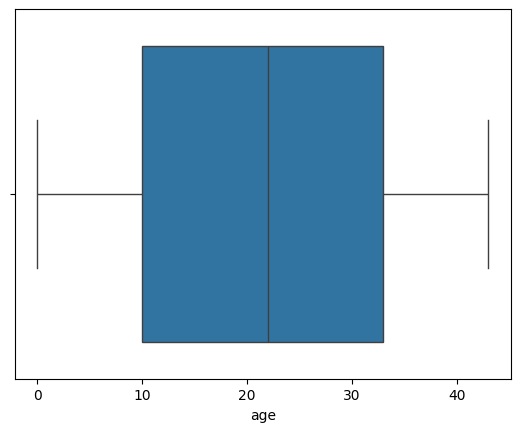

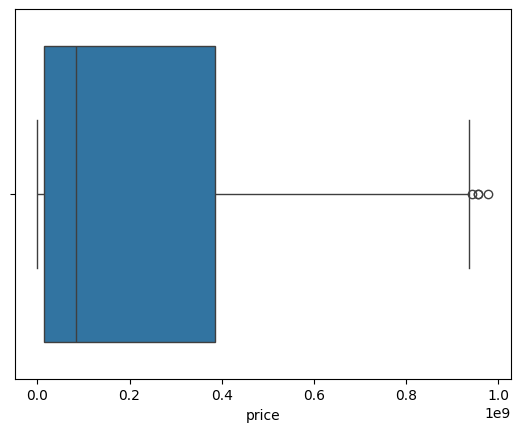

In [ ]:
for col in df_numerical.columns:
  sns.boxplot(x=df_numerical[col])
  plt.show()

In [ ]:
#Inter Quantile Range

Q1 = df_numerical.quantile(0.25)
Q3 = df_numerical.quantile(0.75)

IQR = Q3-Q1

lower_bound  = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

df_numerical = df_numerical[~((df_numerical < lower_bound) | (df_numerical > upper_bound)).any(axis=1)]

In [ ]:
df_numerical.shape

(10334, 8)

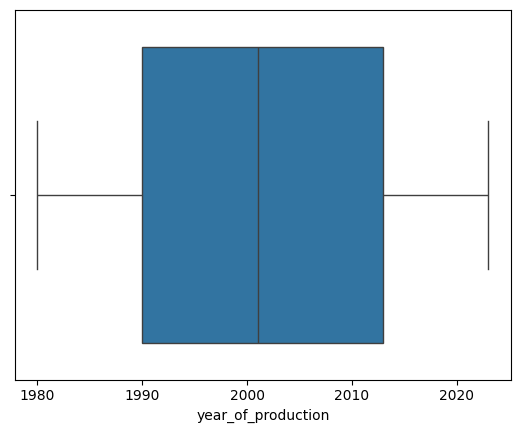

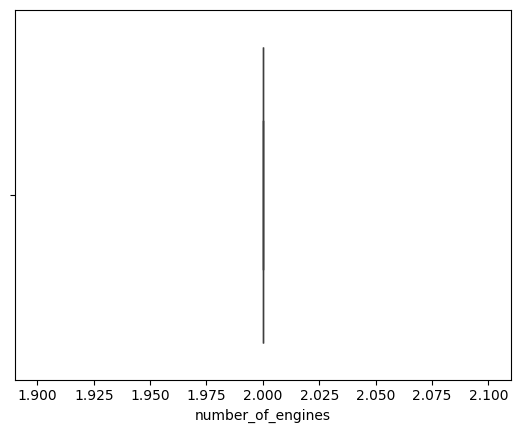

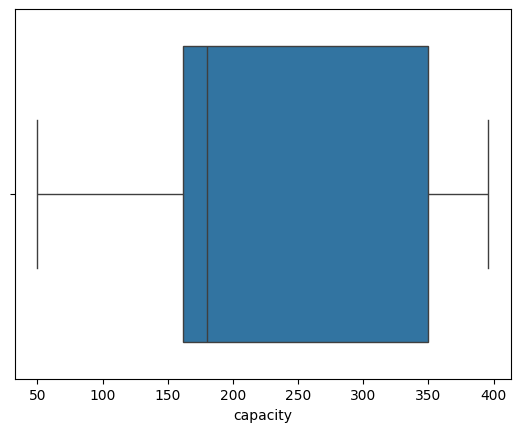

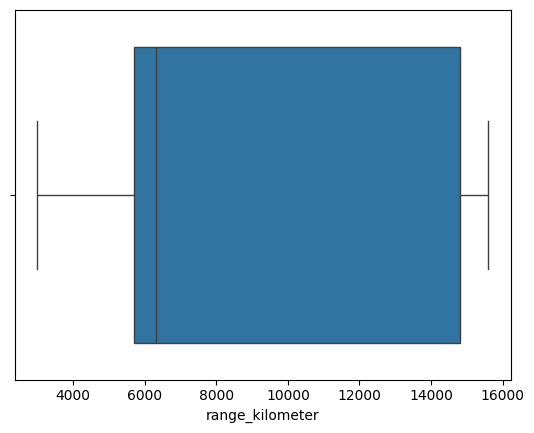

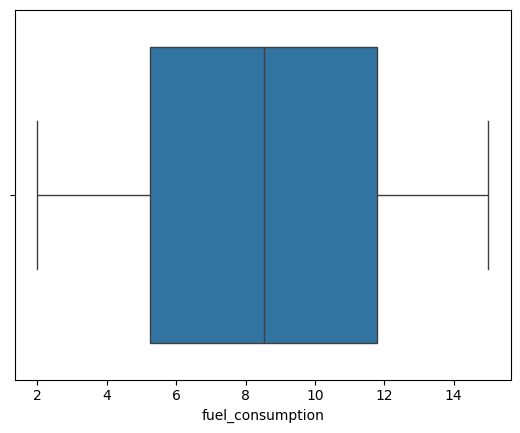

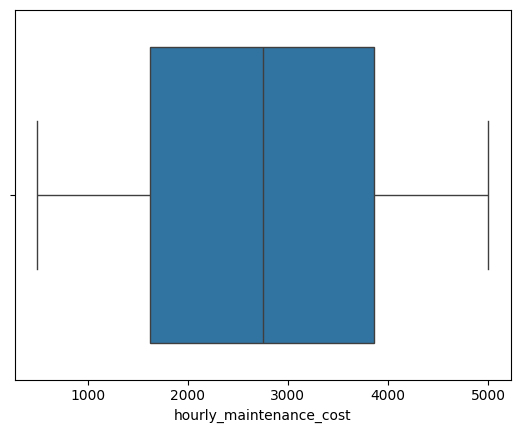

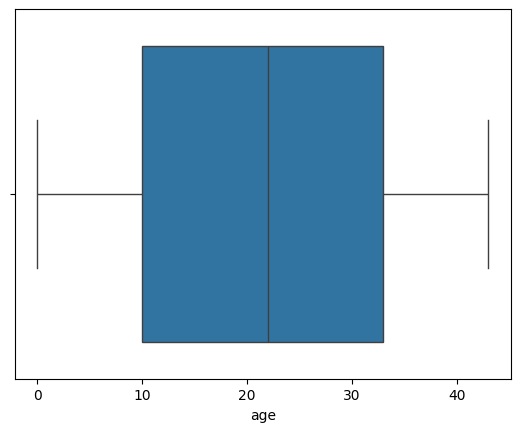

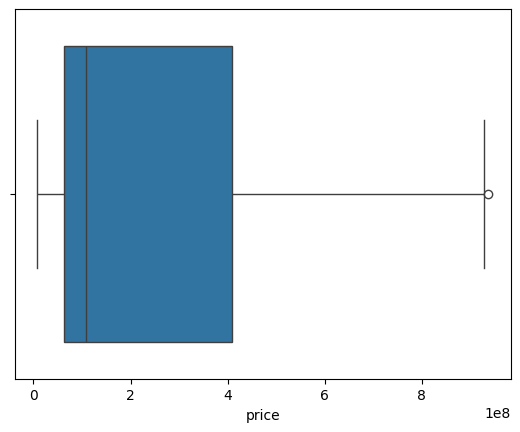

In [ ]:
for col in df_numerical.columns:
  sns.boxplot(x=df_numerical[col])
  plt.show()

In [ ]:
df1 = df_numerical.copy()

In [ ]:
X = df1.drop('price', axis=1)
Y = df1['price']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(8267, 7)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8267, 7)
(8267,)
(2067, 7)
(2067,)


In [ ]:
X_train

array([[ 1.14330434,  0.        , -0.37534557, ..., -0.16956508,
         0.49412778, -1.14330434],
       [ 1.61331588,  0.        ,  0.96379676, ..., -0.52185588,
         1.66339346, -1.61331588],
       [ 0.51662229,  0.        , -1.39939559, ..., -1.63477457,
         0.71697737, -0.51662229],
       ...,
       [ 0.98663383,  0.        ,  1.32615292, ...,  0.81257899,
        -0.9999262 , -0.98663383],
       [-1.67676488,  0.        , -0.51713711, ...,  0.54836089,
        -0.81772242,  1.67676488],
       [-1.12841809,  0.        , -0.37534557, ...,  1.2796312 ,
        -0.14749101,  1.12841809]])

In [ ]:
X_test

array([[-1.36342386,  0.        ,  0.96379676, ..., -1.4906556 ,
         0.86558235,  1.36342386],
       [-0.11005976,  0.        ,  0.96379676, ...,  1.20757172,
        -1.20198205,  0.11005976],
       [-0.89341232,  0.        ,  1.32615292, ..., -1.57072169,
         0.60420955,  0.89341232],
       ...,
       [ 1.37831011,  0.        , -1.39939559, ..., -0.91151087,
         0.79377681, -1.37831011],
       [ 0.28161653,  0.        , -1.39939559, ...,  0.03326903,
        -1.31057414, -0.28161653],
       [-1.36342386,  0.        , -0.37534557, ..., -1.60808587,
         0.72429454,  1.36342386]])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lin_reg.predict(X_test)
y_pred

array([4.13117516e+08, 4.84000512e+08, 4.50944604e+08, ...,
       9.16953660e+07, 2.61765611e+07, 2.65013761e+07])

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 4582438474392252.0
Mean Absolute Error: 51182657.57068976
Root Mean Squared Error: 67693710.74473797
R-squared: 0.9142005860668128


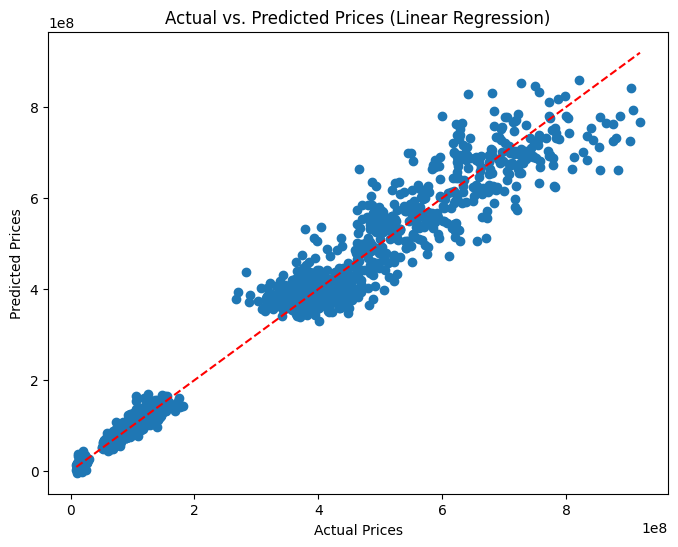

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()

In [ ]:
df1.head()

year_of_production  number_of_engines  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age         price
0                1987                  2        50             3000            14.360                 2185.430   36  12857083.910
1                1997                  2        50             3000             4.030                 1202.080   26  13914058.550
2                1988                  2       180             6300            13.260                  761.380   35  90735695.860
3                2023                  2       162             5700            14.610                  592.630    0 136659689.370
5                1982                  2       350            14800             8.820                 1869.090   41 354976612.820

In [ ]:
df.head()

model  year_of_production  number_of_engines engine_type  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age Sales Territory         price
0  Bombardier CRJ200                1987                  2    Turbofan        50             3000            14.360                 2185.430   36            Asya  12857083.910
1  Bombardier CRJ200                1997                  2    Turbofan        50             3000             4.030                 1202.080   26          Avrupa  13914058.550
2        Airbus A320                1988                  2    Turbofan       180             6300            13.260                  761.380   35      Avustralya  90735695.860
3         Boeing 737                2023                  2    Turbofan       162             5700            14.610                  592.630    0      Avustralya 136659689.370
4         Cessna 172                1985                  1      Piston         4             1285            18.490                 4245.990   38   Güney Amerika    203798.100

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=100, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 4582438474392252.0
Mean Absolute Error: 51182657.57068976
Root Mean Squared Error: 67693710.74473797
R-squared: 0.9142005860668128


In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 1325488308937055.5
Mean Absolute Error: 21260565.870203797
Root Mean Squared Error: 36407256.26763236
R-squared: 0.9751821828666944


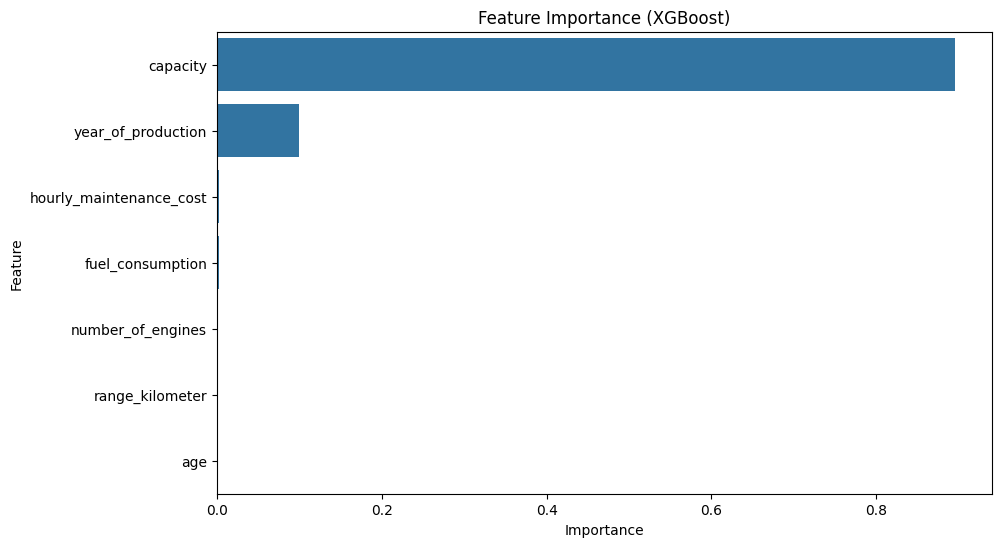

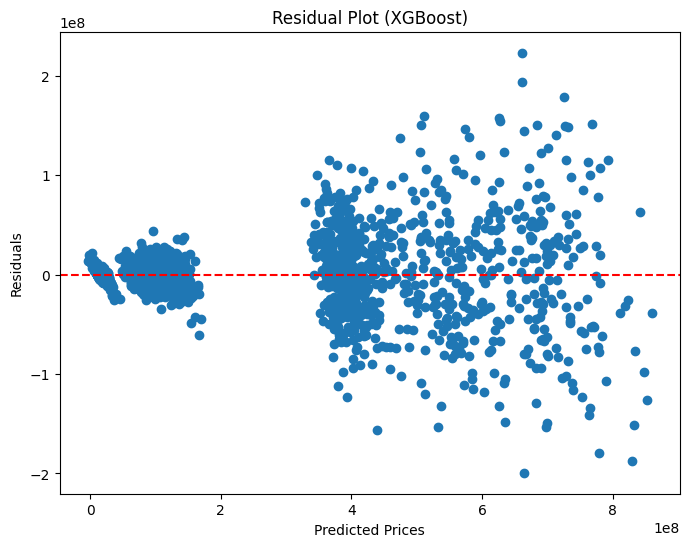

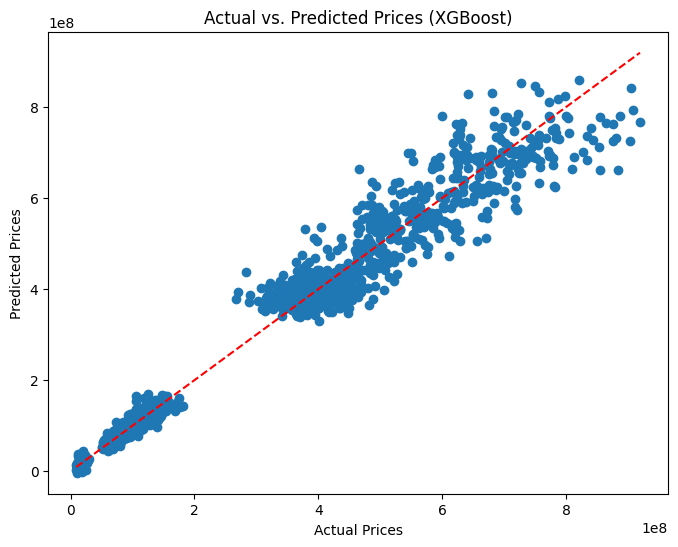

In [ ]:
# prompt: do visualiztion for xgb_model

import matplotlib.pyplot as plt
import seaborn as sns
importances = xgb_model.feature_importances_
feature_names = list(X.columns)
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot (XGBoost)")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero
plt.show()

# Actual vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (XGBoost)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
y_pred_dtr

array([3.28023247e+08, 4.39281509e+08, 4.27002743e+08, ...,
       2.67140483e+07, 1.69340496e+07, 7.71612982e+07])

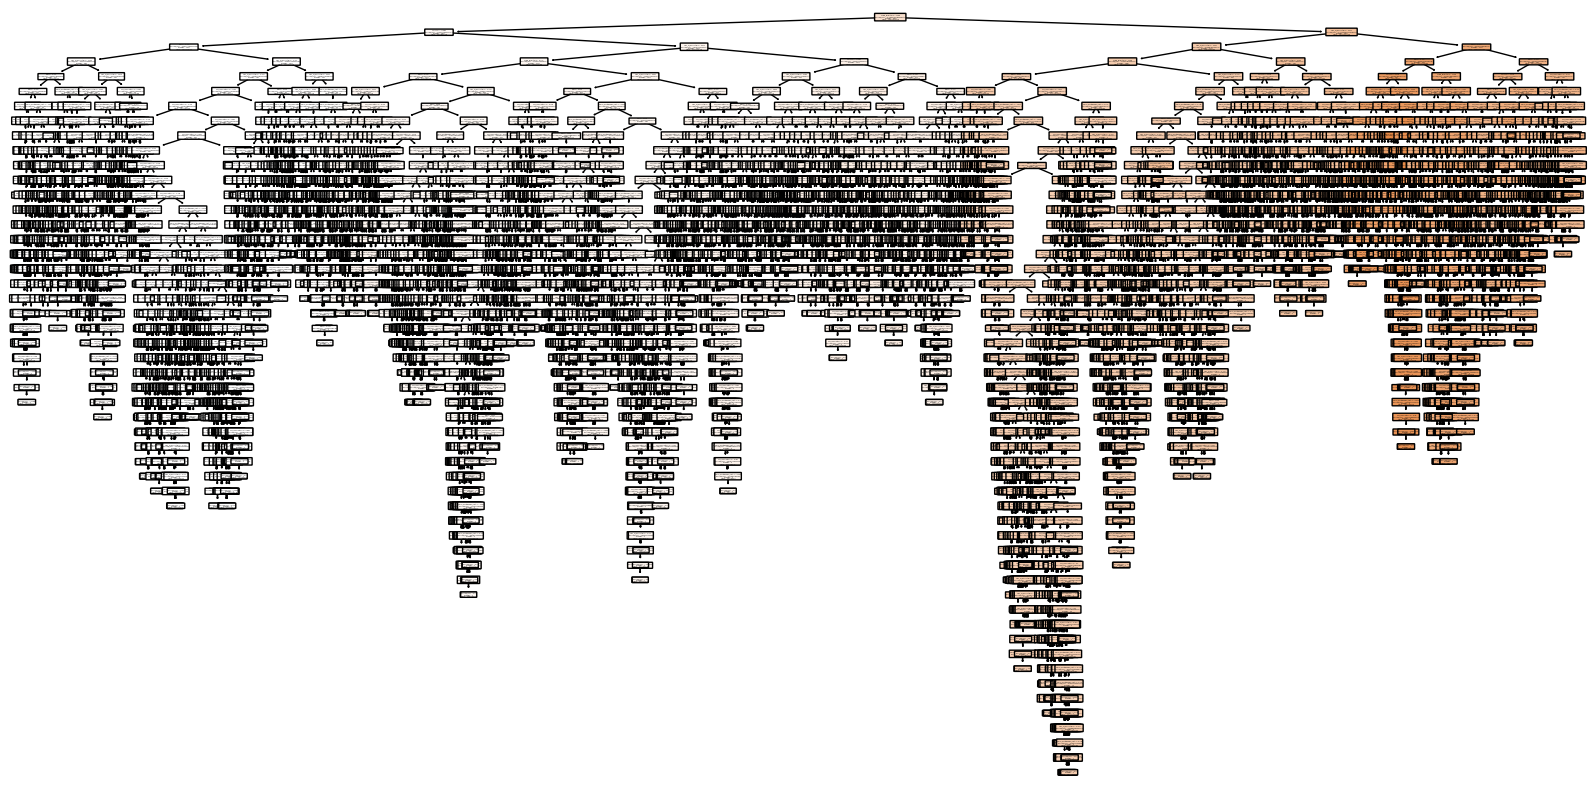

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dtr, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred_dtr)
mae = mean_absolute_error(y_test, y_pred_dtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dtr)

In [ ]:
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2335539879568465.0
Mean Absolute Error: 27547128.619037252
Root Mean Squared Error: 48327423.6802301
R-squared: 0.9562704542560961


In [ ]:
df.head()

model  year_of_production  number_of_engines engine_type  capacity  range_kilometer  fuel_consumption  hourly_maintenance_cost  age Sales Territory         price
0  Bombardier CRJ200                1987                  2    Turbofan        50             3000            14.360                 2185.430   36            Asya  12857083.910
1  Bombardier CRJ200                1997                  2    Turbofan        50             3000             4.030                 1202.080   26          Avrupa  13914058.550
2        Airbus A320                1988                  2    Turbofan       180             6300            13.260                  761.380   35      Avustralya  90735695.860
3         Boeing 737                2023                  2    Turbofan       162             5700            14.610                  592.630    0      Avustralya 136659689.370
4         Cessna 172                1985                  1      Piston         4             1285            18.490                 4245.990   38   Güney Amerika    203798.100

In [ ]:
df['price'].unique()

array([12857083.91, 13914058.55, 90735695.86, ..., 98709939.2 ,
         396520.67, 23207818.82])

# **Hyperparamter tuning**

In [ ]:


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_tuned = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test)


mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("Tuned Mean Squared Error:", mse_tuned)
print("Tuned Mean Absolute Error:", mae_tuned)
print("Tuned Root Mean Squared Error:", rmse_tuned)
print("Tuned R-squared:", r2_tuned)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: -1208937240494544.5
Tuned Mean Squared Error: 1156381344910754.5
Tuned Mean Absolute Error: 19107716.312790487
Tuned Root Mean Squared Error: 34005607.55097245
Tuned R-squared: 0.9783484618001833


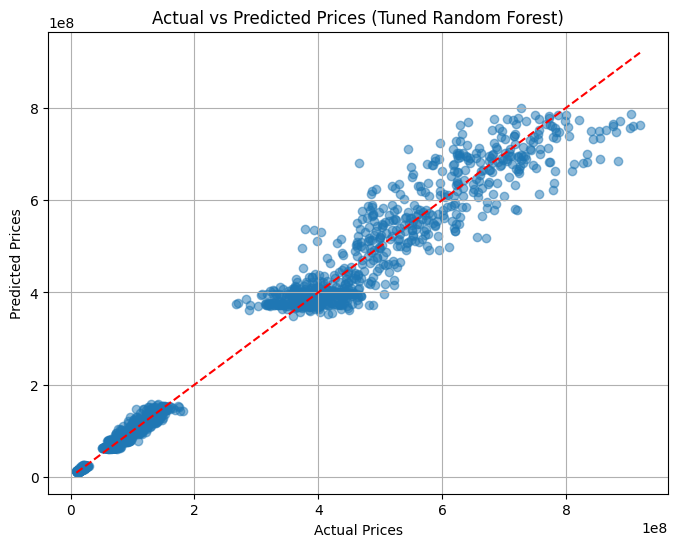

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line for reference
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Tuned Random Forest)")
plt.grid(True)
plt.show()

In [ ]:
df.shape

(12377, 11)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(8267, 3)

In [ ]:
X_test_pca.shape

(2067, 3)

In [ ]:
lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = lin_reg_pca.predict(X_test_pca)

In [ ]:
y_pred_pca

array([ 3.80538058e+08,  4.50284276e+08,  4.63016616e+08, ...,
        4.67322836e+07, -1.76906537e+07,  6.40642933e+07])

In [ ]:
mse = mean_squared_error(y_test, y_pred_pca)
mae = mean_absolute_error(y_test, y_pred_pca)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_pca)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 5630481925685551.0
Mean Absolute Error: 58345760.642629325
Root Mean Squared Error: 75036537.27142233
R-squared: 0.8945775154244064


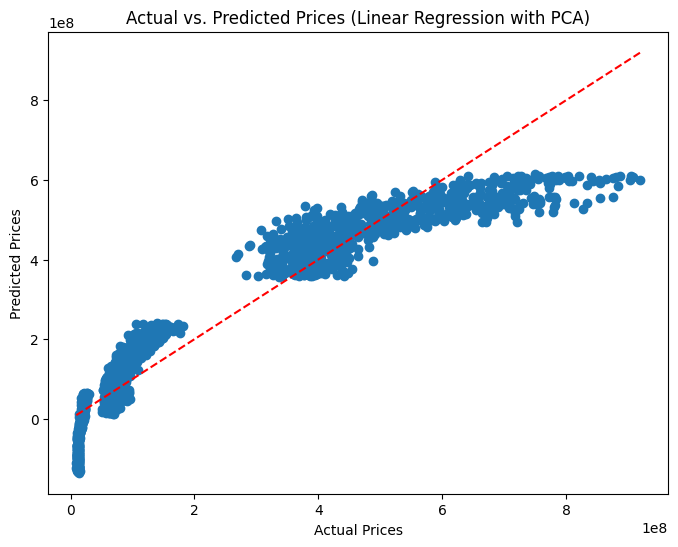

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_pca)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Linear Regression with PCA)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line
plt.show()